# MODULE 4: DATA EXPLORATION #

**Univariate Data Exploration**
* ID Data Anomalies and outliers using univariate exploration techniques  

Data exploration serves many purposes:
* Understand basic relationships in the data for commonsense checks on model output
* Check relationships against common knowledge and intuition - to ID potential errors that could mislead model.
* ID outliers and understand potential effects on the model.
* Gain clues and insights for potential predictors.

**2 ways of understanding variable distribution**
* Summary statistics and data visualization
* Summary statistics are an important concise view - but perhaps not robust enough (which visualizations should be)
* Specifics depends on categorical / numerical.  

**Numerical Variables**
* Need to understand mean/median ; spread ; skewness ; "fatness" of tails ; multimodial "shapes"
* Summary Statistics ; Histograms ; Box Plots  

**Central Tendency**
* Mean ; median ; mode ; Percentiles ; Max/Min
* Compare Median to Mean for symmetry or skew

**Spread of Variable**
* Variance ; Interquartile Distance ; Skewness ; Kurtosis
* LEFT SKEW:  Negative skew = more values above mean
* NEGATIVE KURTOSIS: Thin Tails ; more values (than Normal would suggest) concentrated around mean compared w tails  

* Variables that can't be Negative - right skew is expected
* Heavily skewed variables make kurtosis less informative

**Visualizing Numeric Variables**
* Histograms (density plots) and box plots.
* Histograms - affected by bin size.  

**Categorical Variables**
* Frequency Tables provide the simplest way of summarizing a categorical variable.
* Look at count as well as frequency
* Visualize with bar charts - particularly with increasing number of levels  

**Outliers**
* Appear to diverge from overall pattern of data.  
* Skewed data can explain some.
* Can affect models if for instance a y outlier is using OLS.
* Should check for univariate vs multivariate outliers.
* Should investigate if outliers are natural or errors.
* Can remove ; ignore ; use robust model forms ; modify the outlier  



# BIVARIATE DATA EXPLORATION #
* 3 types of variable combinations to explore:
    * Categorical/Categorical
    * Categorical/Numeric
    * Numeric/Numeric

**Examine Target Variable Relationship**
* Most basic of relationships - necessary before moving onto more complicated relationships.  

**Rough Guide for Prioritizing among Numerous Combinations**
1. Examine relationship between target and each predictor
2. Examine "obvious" or well-known relationships
3. Other interesting relationships you hypothesize
4. Other relationships for sense-checking

# PRINCIPAL COMPONENT ANALYSIS #
* Unsupervised learning (there is no target variable)
* Attempts to simplify high dimensional data.
* Retain as much information about the data as possible with as few variables as possible.
* For PCA: Information is defined as spread (variance).
* Projection onto a direction of maximal variance minimizes distance from an old (higher dimensional) data point to its new transformed value.
* These "directions" are just linear combinations of the input variables and can be used as "summary variables" themselves.
* More useful for 3+ Dimensional data - start with simpler 2D example.
* Components should be orthogonal (perpendicular) to each other.  Otherwise results are not as helpful - as components can be highly correlated?

# SIMPLE EXAMPLE
* Subset 2 columns from the diamonds dataset (length and depth).
* Center and scale the data (arguments set to TURE)
* Show summary


In [1]:
library(ggplot2)
diamonds.2d.pca <- subset(diamonds[ ,c(8, 10)], x >= 3 & x <= 10 & z > 0 & z <=7.5)
d.pca.2d <- prcomp(diamonds.2d.pca, center = TRUE, scale. = TRUE)
summary(d.pca.2d)


Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


Importance of components:
                          PC1     PC2
Standard deviation     1.4110 0.09489
Proportion of Variance 0.9955 0.00450
Cumulative Proportion  0.9955 1.00000

# WHAT ARE THE PRINCIPAL COMPONENTS?
* Assume each variable has been centered (mean has been subtracted).
* Principal component turns each record into a single number by taking a linear combination of the variable values.
* For record (i) - write Principal Component (p) as weighted average of n observations that make up the record.  Weights are for Principal Component (p).
* Loadings are determined such that variance is maximized subject to constraint that sum of squares of loadings = 1.  Without this constraint - variance could be increased by simply increasing loadings.


# HIGHER DIMENSIONAL DATA 
* Include more columns from diamonds dataset


In [2]:
diamonds.5d.pca <- subset(diamonds[ ,c(5, 7:10)], x >= 3 & x <= 10 & z > 0 & z <=7.5)
d.pca.5d <- prcomp(diamonds.5d.pca, center = TRUE, scale. = TRUE)
summary(d.pca.5d)


Importance of components:
                          PC1    PC2     PC3     PC4    PC5
Standard deviation     1.9531 1.0053 0.40717 0.08745 0.0389
Proportion of Variance 0.7629 0.2021 0.03316 0.00153 0.0003
Cumulative Proportion  0.7629 0.9650 0.99817 0.99970 1.0000

# DEFINE COMPONENTS


In [3]:
d.pca.5d$rotation

,PC1,PC2,PC3,PC4,PC5
depth,0.005726407,0.99460964,0.0249120,-0.043331493,0.090667807
price,0.478009344,-0.02502456,0.8779693,-0.007121981,-0.000310855
x,0.507886226,-0.03518147,-0.2733825,0.481397261,0.659039114
y,0.506911756,-0.03841566,-0.2836171,-0.809086934,0.080649640
z,0.506523769,0.08609264,-0.2708740,0.334225477,-0.742254898


# CENTERING AND SCALING
* Centering needs to be done regardless - so easier to do that up front.
* Scaling only matters if you have different scales for various components.
* To demonstrate, look at a couple of examples with and without scaling ; with and without centering.


In [5]:
set.seed(1000)
diamonds.sample <- diamonds[sample(1:nrow(diamonds), 5000), ]
diamonds.3d.sample <- subset(diamonds.sample[ ,c(8:10)], x >= 3 & x <= 10 & z > 0 & z <=7.5)
diamonds.5d.sample <- subset(diamonds.sample[ ,c(5, 7:10)], x >= 3 & x <= 10 & z > 0 & z <=7.5)

#Compute PCA for the two samples, one scaled and one without
d.3d.scale <- prcomp(diamonds.3d.sample , center = TRUE, scale. = TRUE)
d.3d.noscale <- prcomp(diamonds.3d.sample , center = TRUE, scale. = FALSE)
d.5d.scale <- prcomp(diamonds.5d.sample , center = TRUE, scale. = TRUE)
d.5d.noscale <- prcomp(diamonds.5d.sample , center = TRUE, scale. = FALSE)



# 3D DATASET SUMMARY
* All 3 columns on very similar scale


In [6]:
summary(diamonds.3d.sample)


       x               y               z        
 Min.   :3.790   Min.   :3.750   Min.   :2.270  
 1st Qu.:4.700   1st Qu.:4.710   1st Qu.:2.900  
 Median :5.690   Median :5.710   Median :3.520  
 Mean   :5.727   Mean   :5.729   Mean   :3.535  
 3rd Qu.:6.540   3rd Qu.:6.540   3rd Qu.:4.040  
 Max.   :9.440   Max.   :9.370   Max.   :5.970  

# 5D DATASET SUMMARY
* New columns much larger than original 3.  Especially price.


In [7]:
summary(diamonds.5d.sample)


     depth           price             x               y        
 Min.   :53.20   Min.   :  327   Min.   :3.790   Min.   :3.750  
 1st Qu.:61.00   1st Qu.:  945   1st Qu.:4.700   1st Qu.:4.710  
 Median :61.80   Median : 2389   Median :5.690   Median :5.710  
 Mean   :61.73   Mean   : 3927   Mean   :5.727   Mean   :5.729  
 3rd Qu.:62.50   3rd Qu.: 5376   3rd Qu.:6.540   3rd Qu.:6.540  
 Max.   :70.20   Max.   :18768   Max.   :9.440   Max.   :9.370  
       z        
 Min.   :2.270  
 1st Qu.:2.900  
 Median :3.520  
 Mean   :3.535  
 3rd Qu.:4.040  
 Max.   :5.970  

# P1: 3D SCALED


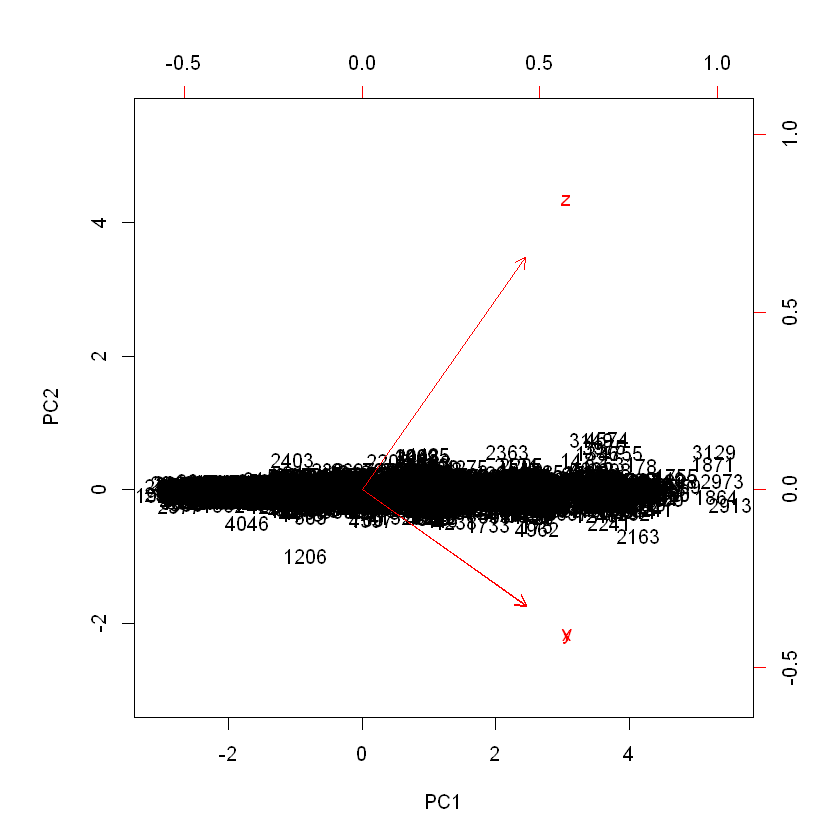

In [8]:
p1 <- biplot(d.3d.scale , scale = 0) #main = "3D Scaled"


# P2: 3d NO SCALE


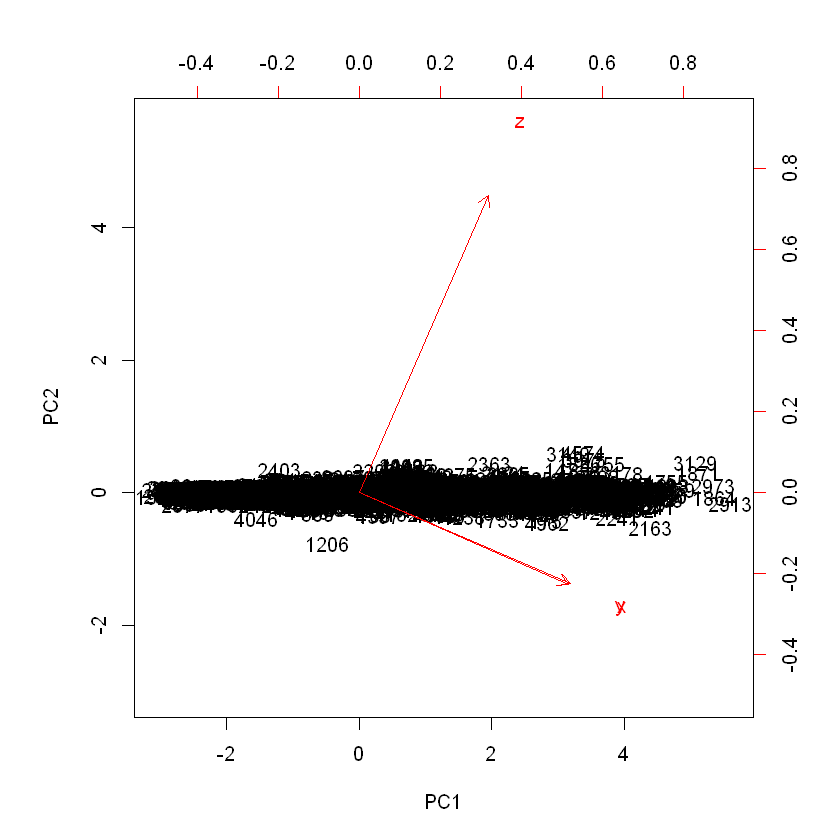

In [9]:
p2 <- biplot(d.3d.noscale , scale = 0) #main = "3D No Scale"


# P3: 5D SCALED


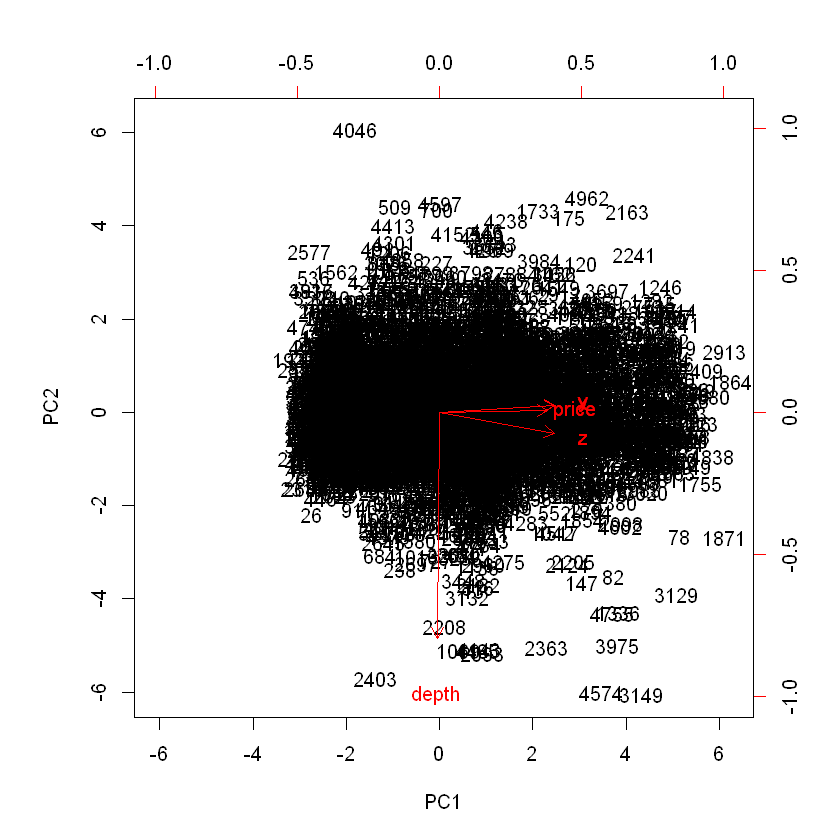

In [10]:
p3 <- biplot(d.5d.scale , scale = 0) #main = "5D Scaled"


# P4: 5D NO SCALE


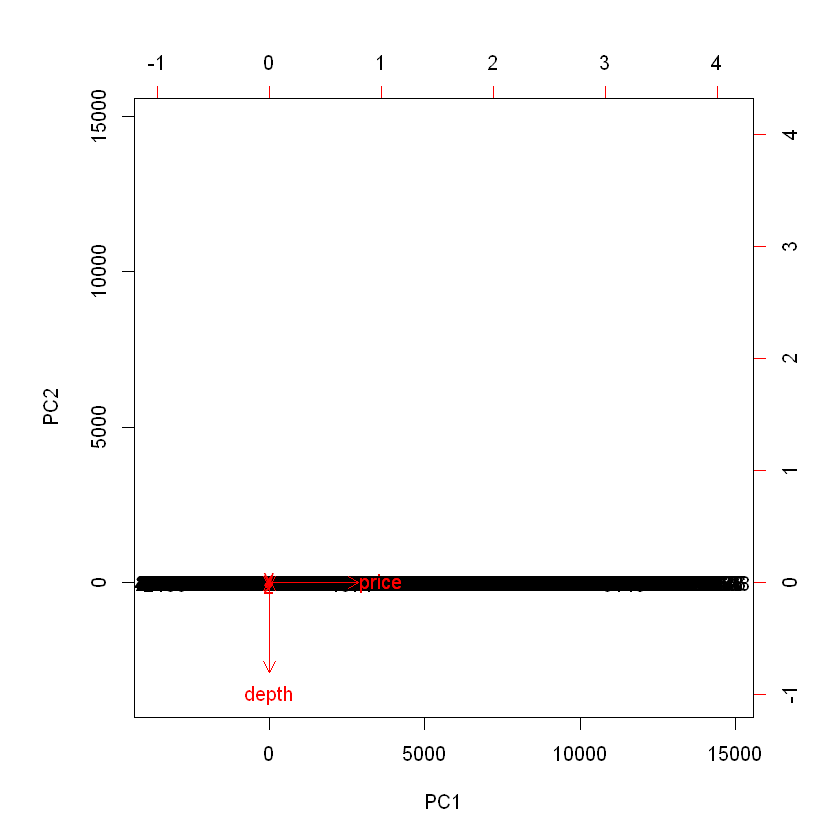

In [11]:
p4 <- biplot(d.5d.noscale , scale = 0)  #main = "5D No Scale"


# SCALE NO SCALE


In [12]:
summary(d.3d.scale)
d.3d.scale$rotation
summary(d.3d.noscale)
d.3d.noscale$rotation


Importance of components:
                          PC1     PC2     PC3
Standard deviation     1.7285 0.10403 0.03866
Proportion of Variance 0.9959 0.00361 0.00050
Cumulative Proportion  0.9959 0.99950 1.00000

,PC1,PC2,PC3
x,0.5778063,-0.4058435,0.708117896
y,0.5777985,-0.4093703,-0.706091269
z,0.5764450,0.8171334,-0.002040932


Importance of components:
                          PC1     PC2     PC3
Standard deviation     1.7291 0.08088 0.04338
Proportion of Variance 0.9972 0.00218 0.00063
Cumulative Proportion  0.9972 0.99937 1.00000

,PC1,PC2,PC3
x,0.6510776,-0.2807698,0.705171108
y,0.6459405,-0.2829049,-0.709031512
z,0.3985711,0.9171331,-0.002832469


# 5 VARIABLE PROBLEM


In [13]:
summary(d.5d.scale)
d.5d.scale$rotation
summary(d.5d.noscale)
d.5d.noscale$rotation


Importance of components:
                          PC1    PC2     PC3     PC4     PC5
Standard deviation     1.9544 1.0051 0.41018 0.03862 0.02286
Proportion of Variance 0.7639 0.2020 0.03365 0.00030 0.00010
Cumulative Proportion  0.7639 0.9659 0.99960 0.99990 1.00000

,PC1,PC2,PC3,PC4,PC5
depth,-0.01133691,-0.99466820,-0.01769969,0.005781080,-0.100796556
price,0.47725732,0.01004987,-0.87868674,0.005563671,0.001763343
x,0.50783152,0.02996502,0.28007094,0.730125962,-0.360118863
y,0.50804428,0.03114102,0.27108157,-0.681128213,-0.451110170
z,0.50605838,-0.09309407,0.27508432,-0.054000579,0.810340030


Importance of components:
                        PC1   PC2    PC3    PC4     PC5
Standard deviation     3984 1.419 0.8016 0.0433 0.01786
Proportion of Variance    1 0.000 0.0000 0.0000 0.00000
Cumulative Proportion     1 1.000 1.0000 1.0000 1.00000

,PC1,PC2,PC3,PC4,PC5
depth,-1.001522e-05,-9.983332e-01,0.0155160013,-1.481310e-03,5.556879e-02
price,9.999999e-01,-1.601593e-05,-0.0003843126,-1.600958e-06,-2.409386e-07
x,2.501101e-04,2.547497e-02,0.6525446078,-7.125702e-01,2.564765e-01
y,2.486224e-04,2.613444e-02,0.6427261027,7.006431e-01,3.087383e-01
z,1.532541e-04,-4.470847e-02,0.4010583471,3.661616e-02,-9.142279e-01


# CLUSTERING #

Clustering is an example of unsupervised learning (like PCA).  We do not have a target variable in mind when running this algorithm.  The goal of clustering is to assign each observation to a limited number of groups.  Each observation within a group should be similar to each other in some way.

**K-Means Clustering:** K-means algorithm defines a group by its center.  Each observation is assigned to the group with the closest center.  Need to be careful of outliers with this algorithm.  Uses the following iterative algorith:

1. Pick k random centers.
2. Assign each observation to the group that has the closest center.
3. Calculate new centers for groups formed in step 2.
4. If difference between centers from steps 2 and 3 is below threshold - done - otherwise back to step 2.


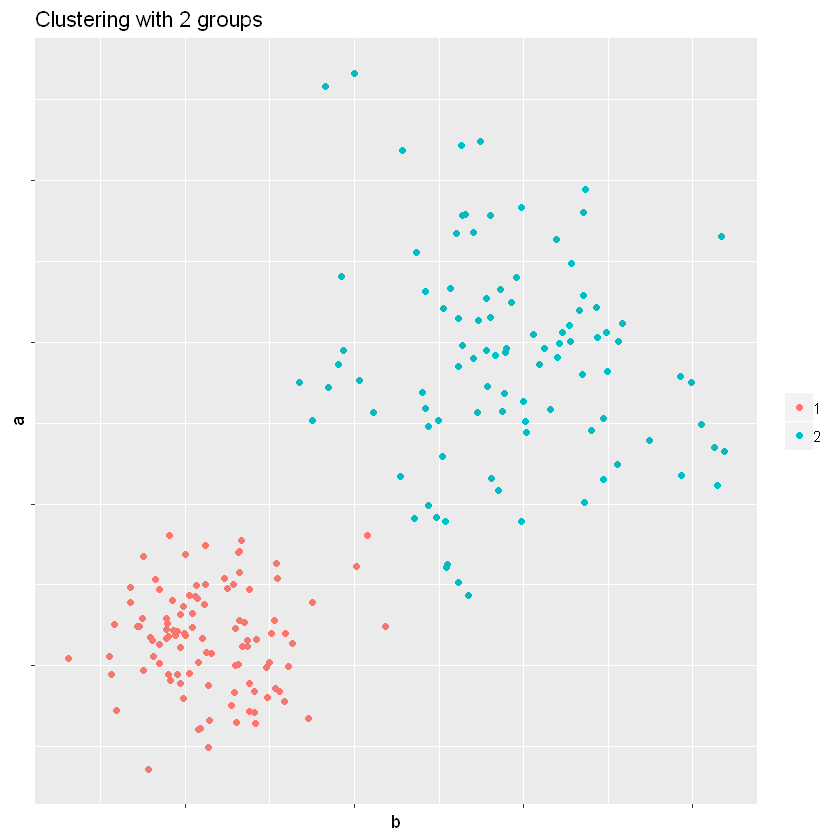

In [15]:
library(ggplot2)
library(gridExtra)
set.seed(1000)
income_male <- rnorm(100, 70000, 10000)
income_female <- rnorm(100, 45000, 5000)
age <- rnorm(100, 65, 10)
age2 <- rnorm(100, 35, 5)

df <- data.frame(a = c(income_male,income_female), b = c(age,age2))

df$group_random <- NULL
df$a <- scale(df$a)
df$b <- scale(df$b)
km2 <- kmeans(df, 2)
df$group2 <- as.factor(km2$cluster)

ggplot(data = df, aes(x = b, y = a, col = group2)) + 
  geom_point() +
  theme(axis.text = element_blank(), legend.title = element_blank()) +
  ggtitle("Clustering with 2 groups")


**NOTES:**  

* Need to scale data before applying algorithm which uses distance.
* Need to remove algorithms which will distort results.

# CURSE OF DIMENSIONALITY
As the number of dimensions increases...
* Visualizations become impossible.
* As number of dimensions increases, distance between points converges.  

# HOW MANY CLUSTERS?  ELBOW METHOD!
* Elbow Method: Percentage of variance explained as we add each cluster.
* Look for this to drop off at some point.

# HIERARCHICAL CLUSTERING
Similar to k-means clustering.  Instead of finding k-distinct clusters - build a hierarchy of clusters without specifying the number of clusters in advance.  In the end - forms a tree structure.  2 approaches:

* Agglomerative: Begin by considering each observation as a cluster.  Gradually group with nearby clusters until you have just one cluster.  Bottom-Up approach.
* Divisive: Work from single cluster to a cluster for each observation.  Top-Down approach.
* Dendograms form a nice view of this hierarchy.